# Visualization for Benchmarking

## For XGBoosts (15 plots)

RMSE for 1-Day forecast at Little Collins St-Swanston St (East): 88.85058915431901


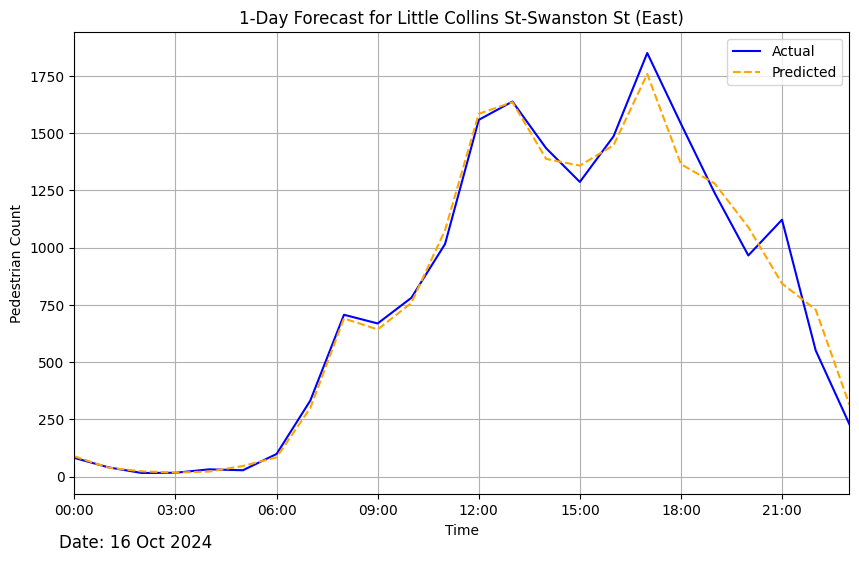

RMSE for 7-Days forecast at Little Collins St-Swanston St (East): 93.37178733902837


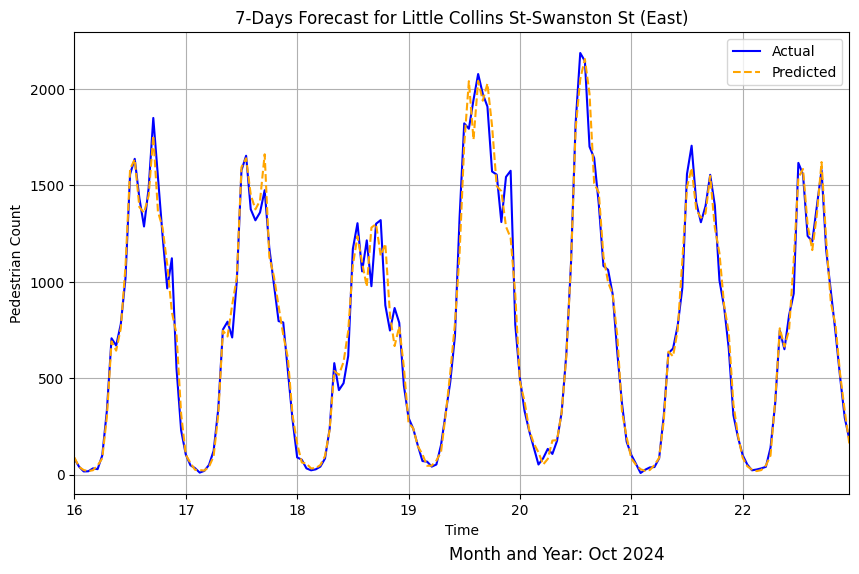

RMSE for 16-Days forecast at Little Collins St-Swanston St (East): 86.78514604643405


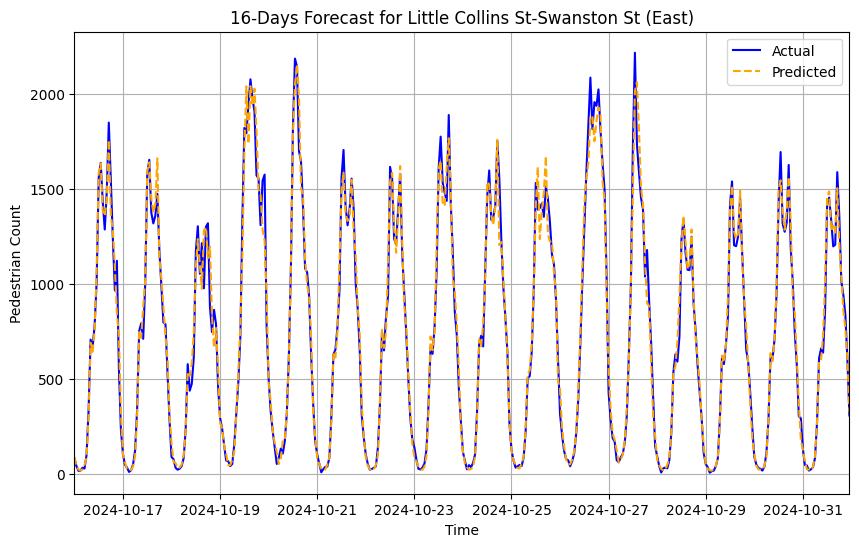

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.dates as mdates

# Load the datasets
actual_data = pd.read_csv('first_5_points copy.csv')
predicted_data = pd.read_csv('predictionsXGB.csv', index_col=0)

# Ensure the 'Datetime' column in actual_data is in datetime format
actual_data['Datetime'] = pd.to_datetime(actual_data['Datetime'])

# Convert the index of predicted_data to datetime format
predicted_data.index = pd.to_datetime(predicted_data.index)

# Align the timestamps for the test period (last 16 days)
# Assuming hourly data, take the last 16 * 24 rows
test_actual = actual_data.iloc[-16 * 24:].set_index('Datetime')
test_predicted = predicted_data.iloc[-16 * 24:]

# Ensure alignment of timestamps
test_predicted = test_predicted[test_predicted.index.isin(test_actual.index)]

# Locations to plot
locations = [
    'Little Collins St-Swanston St (East)'#, 'Faraday St-Lygon St (West)', 'Melbourne Central', 'Chinatown-Lt Bourke St (South)', 'Lonsdale St (South)'
]

# Plot for 1 day, 7 days, and 16 days
forecast_periods = {'1-Day': 24, '7-Days': 7 * 24, '16-Days': 16 * 24}

for location in locations:
    for period_name, period_hours in forecast_periods.items():
        plt.figure(figsize=(10, 6))

        # Slice data for the specific period
        actual = test_actual.iloc[:period_hours][location]
        predicted = test_predicted.iloc[:period_hours][location]

        rmse = np.sqrt(mean_squared_error(actual, predicted))
        print(f"RMSE for {period_name} forecast at {location}: {rmse}")

        # Plot
        plt.plot(actual.index, actual.values, label="Actual", color='blue')
        plt.plot(predicted.index, predicted.values, label="Predicted", color='orange', linestyle='--')

        # Set x-axis limits to span the forecast period
        plt.xlim([actual.index.min(), actual.index.max()])

        # Add labels, title, and legend
        plt.title(f"{period_name} Forecast for {location}")
        plt.xlabel("Time")
        plt.ylabel("Pedestrian Count")
        plt.legend()
        plt.grid()

         # Customize x-axis ticks
        ax = plt.gca()
        if period_name == '1-Day':
            # Format time on the x-axis
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
            # Add common date below the x-axis
            common_date = actual.index[0].strftime('%d %b %Y')
            plt.figtext(0.11, 0.02,f"Date: {common_date}", ha='left', fontsize=12)
        elif period_name == '7-Days':
            # Format days on the x-axis
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
            # Add common month and year below the x-axis
            common_month_year = actual.index[0].strftime('%b %Y')
            plt.figtext(0.5, 0., f"Month and Year: {common_month_year}", ha='left', fontsize=12)

        plt.xticks(rotation=0)

        # Format x-axis ticks for readability
        #plt.gcf().autofmt_xdate()

        plt.show()


Average RMSE for each time horizon:
1-Day: 88.85
7-Days: 93.37
16-Days: 86.79


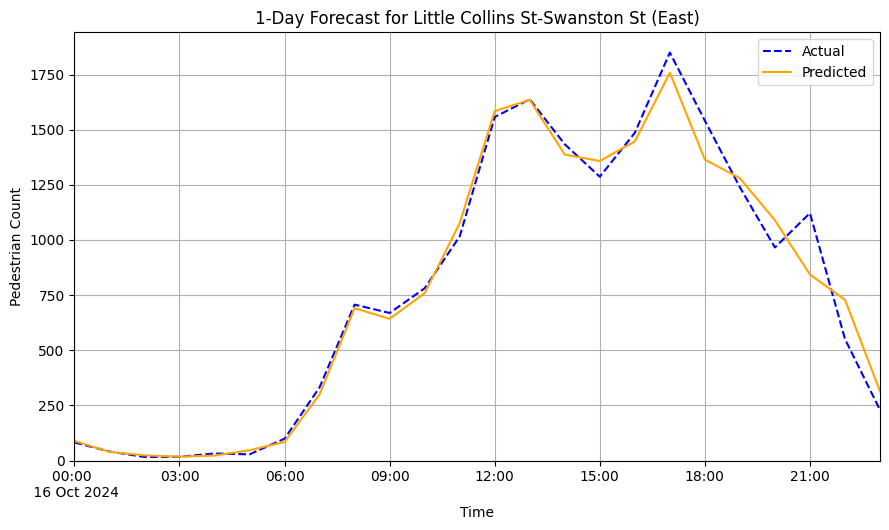

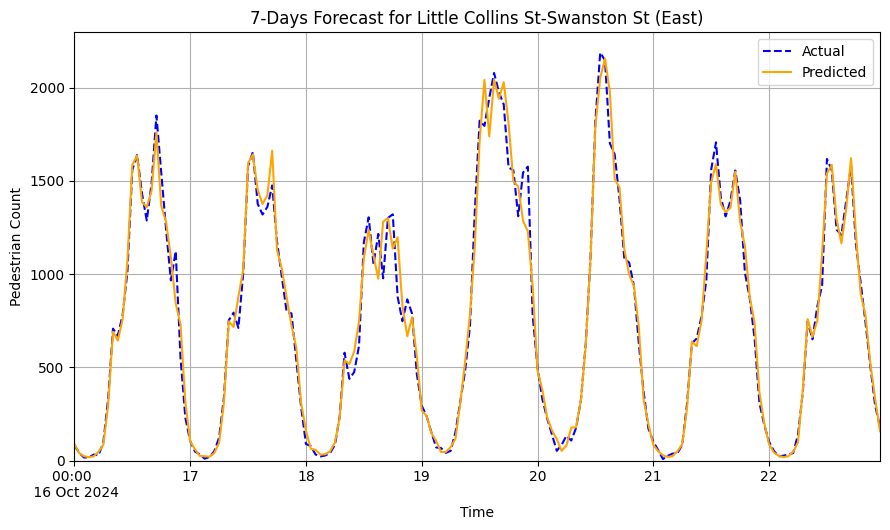

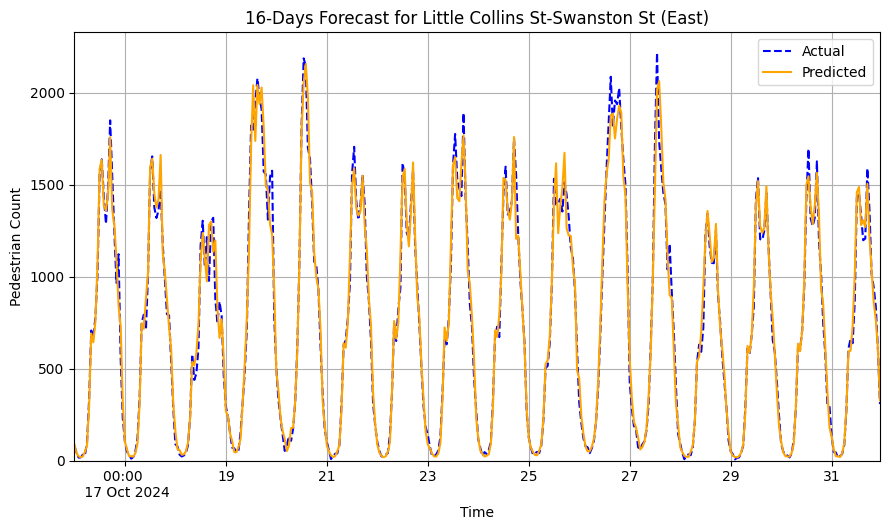

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.dates as mdates

# Load the datasets
actual_data = pd.read_csv('first_5_points copy.csv')
predicted_data = pd.read_csv('predictionsXGB.csv', index_col=0)
#predicted_data = pd.read_csv('predictions_EXPSMOOTHING.csv', index_col=0)
#predicted_data = pd.read_csv('predictionsProphet.csv', index_col=0)
#predicted_data = pd.read_csv('predictionsSarimax.csv', index_col=0)


# Ensure the 'Datetime' column in actual_data is in datetime format
actual_data['Datetime'] = pd.to_datetime(actual_data['Datetime'])

# Convert the index of predicted_data to datetime format
predicted_data.index = pd.to_datetime(predicted_data.index)

# Align the timestamps for the test period (last 16 days)
# Assuming hourly data, take the last 16 * 24 rows
test_actual = actual_data.iloc[-16 * 24:].set_index('Datetime')
test_predicted = predicted_data.iloc[-16 * 24:]

# Ensure alignment of timestamps
test_predicted = test_predicted[test_predicted.index.isin(test_actual.index)]

# Locations to plot
locations = [
    'Little Collins St-Swanston St (East)'#, 'Faraday St-Lygon St (West)', 'Melbourne Central', 'Chinatown-Lt Bourke St (South)', 'Lonsdale St (South)'
]



# Plot for 1 day, 7 days, and 16 days
forecast_periods = {'1-Day': 24, '7-Days': 7 * 24, '16-Days': 16 * 24}

rmse_values = {period_name: [] for period_name in forecast_periods}

for location in locations:
    for period_name, period_hours in forecast_periods.items():
        plt.figure(figsize=(9, 6))

        # Slice data for the specific period
        actual = test_actual.iloc[:period_hours][location]
        predicted = test_predicted.iloc[:period_hours][location]

        rmse = np.sqrt(mean_squared_error(actual, predicted))
        rmse_values[period_name].append(rmse)


        # Plot
        plt.plot(actual.index, actual.values, label="Actual", color='blue', linestyle='--')
        plt.plot(predicted.index, predicted.values, label="Predicted", color='orange')

        # Set x-axis limits to span the forecast period
        plt.xlim([actual.index.min(), actual.index.max()])

        # Add labels, title, and legend
        plt.title(f"{period_name} Forecast for {location}")
        plt.xlabel("Time")
        #plt.xlabel("Date")
        plt.ylabel("Pedestrian Count")
        plt.legend()
        plt.grid()

               # Customize x-axis ticks
        ax = plt.gca()
        if period_name == '1-Day':
            # Format for 1-Day forecast
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
            ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d %b %Y %H:%M'))
        elif period_name == '7-Days':
            # Format for 7-Day forecast
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
            ax.xaxis.set_minor_formatter(mdates.DateFormatter('%d %b %Y'))
        elif period_name == '16-Days':
            # Format for 16-Day forecast
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

        # Adjust the first x-tick to show the full format
        ticks = ax.get_xticks()
        tick_labels = [mdates.num2date(tick).strftime('%H:%M \n %d %b %Y') if i == 0 else mdates.num2date(tick).strftime('%H:%M' if period_name == '1-Day' else '%d') for i, tick in enumerate(ticks)]
        #tick_labels = [mdates.num2date(tick).strftime('%d \n %b %Y') if i == 0 else mdates.num2date(tick).strftime('%H:%M' if period_name == '1-Day' else '%d') for i, tick in enumerate(ticks)]


        ax.set_xticks(ticks)
        ax.set_xticklabels(tick_labels)

        # Ensure x-axis labels are horizontal
        plt.xticks(rotation=0)

        plt.ylim(0, None)
        # Format x-axis ticks for readability
        #plt.gcf().autofmt_xdate()

        plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust layout to avoid overlap
        #plt.show()

print("\nAverage RMSE for each time horizon:")
for period_name, values in rmse_values.items():
    avg_rmse = np.mean(values)
    print(f"{period_name}: {avg_rmse:.2f}")

# 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the datasets
actual_data = pd.read_csv('first_5_points copy.csv')
predicted_data = pd.read_csv('predictionsSarimax.csv', index_col=0)

# Ensure the 'Datetime' column in actual_data is in datetime format
actual_data['Datetime'] = pd.to_datetime(actual_data['Datetime'])

# Convert the index of predicted_data to datetime format
predicted_data.index = pd.to_datetime(predicted_data.index)

# Align the timestamps for the test period (last 16 days)
test_actual = actual_data.iloc[-16 * 24:].set_index('Datetime')
test_predicted = predicted_data.iloc[-16 * 24:]

# Ensure alignment of timestamps
test_predicted = test_predicted[test_predicted.index.isin(test_actual.index)]

# Locations to plot
locations = [
    'Little Collins St-Swanston St (East)', 'Faraday St-Lygon St (West)',
    'Melbourne Central', 'Chinatown-Lt Bourke St (South)', 'Lonsdale St (South)'
]

# Plot for 1 day, 7 days (Monday to Sunday), and 16 days
forecast_periods = {'1-Day': 24, '7-Days': 7 * 24, '16-Days': 16 * 24}

# Function to get a Monday-to-Sunday 7-day cycle
def get_monday_to_sunday_data(actual_df, predicted_df):
    # Find the first Monday in the actual data
    monday_start = actual_df.index[0]
    while monday_start.weekday() != 0:  # 0 = Monday
        monday_start += pd.Timedelta(days=1)
    # Define the range for 7 days starting from this Monday
    week_range = pd.date_range(start=monday_start, periods=7 * 24, freq='H')
    # Align actual and predicted data to this range
    actual_week = actual_df.loc[actual_df.index.isin(week_range)]
    predicted_week = predicted_df.loc[predicted_df.index.isin(week_range)]
    return actual_week, predicted_week

# Create a folder to save the plots
os.makedirs('Sarimax_Plots', exist_ok=True)

for location in locations:
    # Special handling for 7-day (Monday to Sunday) forecast
    actual_week, predicted_week = get_monday_to_sunday_data(test_actual, test_predicted)

    # Plot for 7 days
    plt.figure(figsize=(10, 6))
    plt.plot(actual_week.index, actual_week[location].values, label="Actual", color='blue')
    plt.plot(predicted_week.index, predicted_week[location].values, label="Predicted", color='orange', linestyle='--')
    plt.title(f"7-Days (Monday to Sunday) Forecast for {location}")
    plt.xlabel("Time")
    plt.ylabel("Pedestrian Count")
    plt.legend()
    plt.grid()
    plt.gcf().autofmt_xdate()
    filename = f"Sarimax_Plots/{location.replace(' ', '_').replace('/', '_')}_7-Days_SARIMAX.png"
    plt.savefig(filename, dpi=300)
    plt.close()

    # Plot for 1 day and 16 days
    for period_name, period_hours in forecast_periods.items():
        plt.figure(figsize=(10, 6))

        # Slice data for the specific period
        actual = test_actual.iloc[:period_hours][location]
        predicted = test_predicted.iloc[:period_hours][location]

        # Plot
        plt.plot(actual.index, actual.values, label="Actual", color='blue')
        plt.plot(predicted.index, predicted.values, label="Predicted", color='orange', linestyle='--')

        # Add labels, title, and legend
        plt.title(f"{period_name} Forecast for {location}")
        plt.xlabel("Time")
        plt.ylabel("Pedestrian Count")
        plt.legend()
        plt.grid()

        # Format x-axis ticks for readability
        plt.gcf().autofmt_xdate()

        # Save the plot as an image
        filename = f"Sarimax_Plots/{location.replace(' ', '_').replace('/', '_')}_{period_name}_SARIMAX.png"
        plt.savefig(filename, dpi=300)
        plt.close()

print("All plots have been saved in the 'ExponentialSmoothing_Plots' folder.")

/var/folders/zp/3pv7d9v93sv3l6z25qlm7tpr0000gn/T/ipykernel_7202/1671115126.py:38: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  week_range = pd.date_range(start=monday_start, periods=7 * 24, freq='H')


All plots have been saved in the 'ExponentialSmoothing_Plots' folder.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/julespetitpierre/Desktop/DATA_PROJECT/HSG_BA_and_DS_Applications/person_jules/Benchmarking/XGB/Little_Collins_St-Swanston_St_(East)_7-Days_XGB.png'

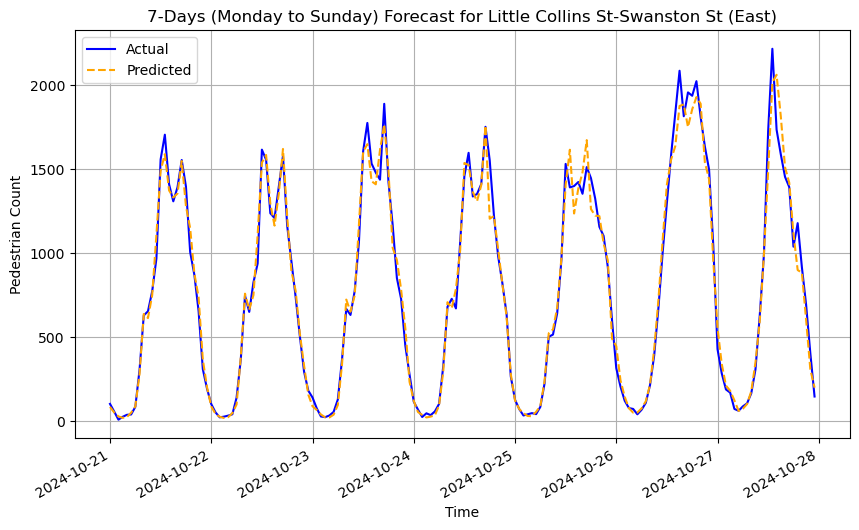

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the datasets
actual_data = pd.read_csv('first_5_points copy.csv')
predicted_data = pd.read_csv('predictionsXGB.csv', index_col=0)

# Ensure the 'Datetime' column in actual_data is in datetime format
actual_data['Datetime'] = pd.to_datetime(actual_data['Datetime'])

# Convert the index of predicted_data to datetime format
predicted_data.index = pd.to_datetime(predicted_data.index)

# Align the timestamps for the test period (last 16 days)
test_actual = actual_data.iloc[-16 * 24:].set_index('Datetime')
test_predicted = predicted_data.iloc[-16 * 24:]

# Ensure alignment of timestamps
test_predicted = test_predicted[test_predicted.index.isin(test_actual.index)]

# Locations to plot
locations = [
    'Little Collins St-Swanston St (East)', 'Faraday St-Lygon St (West)',
    'Melbourne Central', 'Chinatown-Lt Bourke St (South)', 'Lonsdale St (South)'
]

# Plot for 1 day, 7 days (Monday to Sunday), and 16 days
forecast_periods = {'1-Day': 24, '7-Days': 7 * 24, '16-Days': 16 * 24}

# Function to get a Monday-to-Sunday 7-day cycle
def get_monday_to_sunday_data(actual_df, predicted_df):
    # Find the first Monday in the actual data
    monday_start = actual_df.index[0]
    while monday_start.weekday() != 0:  # 0 = Monday
        monday_start += pd.Timedelta(days=1)
    # Define the range for 7 days starting from this Monday
    monday_end = monday_start + pd.Timedelta(days=6, hours=23)  # Full week (Monday to Sunday)
    actual_week = actual_df.loc[monday_start:monday_end]
    predicted_week = predicted_df.loc[monday_start:monday_end]
    return actual_week, predicted_week

# Create a folder to save the plots
os.makedirs('Sarimax_Plots', exist_ok=True)

for location in locations:
    # Special handling for 7-day (Monday to Sunday) forecast
    actual_week, predicted_week = get_monday_to_sunday_data(test_actual, test_predicted)

    # Plot for 7 days
    plt.figure(figsize=(10, 6))
    plt.plot(actual_week.index, actual_week[location].values, label="Actual", color='blue')
    plt.plot(predicted_week.index, predicted_week[location].values, label="Predicted", color='orange', linestyle='--')
    plt.title(f"7-Days (Monday to Sunday) Forecast for {location}")
    plt.xlabel("Time")
    plt.ylabel("Pedestrian Count")
    plt.legend()
    plt.grid()
    plt.gcf().autofmt_xdate()
    filename = f"XGB/{location.replace(' ', '_').replace('/', '_')}_7-Days_XGB.png"
    plt.savefig(filename, dpi=300)
    plt.close()

    # Plot for 1 day and 16 days
    for period_name, period_hours in forecast_periods.items():
        plt.figure(figsize=(10, 6))

        # Slice data for the specific period
        actual = test_actual.iloc[:period_hours][location]
        predicted = test_predicted.iloc[:period_hours][location]

        # Plot
        plt.plot(actual.index, actual.values, label="Actual", color='blue')
        plt.plot(predicted.index, predicted.values, label="Predicted", color='orange', linestyle='--')

        # Add labels, title, and legend
        plt.title(f"{period_name} Forecast for {location}")
        plt.xlabel("Time")
        plt.ylabel("Pedestrian Count")
        plt.legend()
        plt.grid()

        # Format x-axis ticks for readability
        plt.gcf().autofmt_xdate()

        # Save the plot as an image
        filename = f"XGB/{location.replace(' ', '_').replace('/', '_')}_{period_name}_XGB.png"
        plt.savefig(filename, dpi=300)
        plt.close()

print("All plots have been saved in the 'Sarimax_Plots' folder.")